In [18]:
import os
import glob

# Z:\AI\Hi,BB\2021.01.08(금)\양준영\Slience\ZDR-016-가까운거
os.chdir("Z://AI/Hi,BB/2021.01.08(금)/성시경/Slience/ZDR-016-가까운거")
glob_avi = glob.glob("*")
# files = [os.path.basename(f) for f in glob_avi]
glob_avi
# print(os.listdir())

['20210108_171413_F_Nor.AVI',
 '20210108_171444_F_Nor.AVI',
 '20210108_171515_F_Nor.AVI',
 '20210108_171545_F_Nor.AVI',
 '20210108_171616_F_Nor.AVI',
 '20210108_171646_F_Nor.AVI',
 '20210108_171717_F_Nor.AVI',
 '20210108_171748_F_Nor.AVI',
 '20210108_171818_F_Nor.AVI',
 '20210108_171849_F_Nor.AVI',
 '20210108_171920_F_Nor.AVI',
 '20210108_171950_F_Nor.AVI',
 '20210108_172021_F_Nor.AVI',
 '20210108_172052_F_Nor.AVI',
 '20210108_172325_F_Nor.AVI',
 '20210108_172355_F_Nor.AVI',
 '20210108_172426_F_Nor.AVI',
 '20210108_172456_F_Nor.AVI',
 '20210108_172527_F_Nor.AVI',
 '20210108_172558_F_Nor.AVI',
 '20210108_172628_F_Nor.AVI']

# Resampling

In [19]:
import librosa
import soundfile as sf

TARGET_SR = 16000

# def join_audio(files):
#     joined = []
#     for f in files:
#         data, sr = librosa(f, sr=None)
#         joined = joined + data
#     data, sr = librosa.load(file_name, sr=None)
#     joined = []

def change_sr(file_name, destination, target_sr=TARGET_SR):
    data, sr = librosa.load(file_name, sr=None)
    resampled = librosa.resample(data, sr, target_sr)
    sf.write(destination, resampled, target_sr)
    print(resampled)
    
change_sr(glob_avi[3], 'Z://AI/Hi,BB/BB_test/성시경_가까운거_test.wav')

C:\Users\jason\anaconda3\envs\audio\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[-0.00148258 -0.00242085 -0.00283301 ...  0.00142035  0.00146757
  0.        ]


# Wave plot

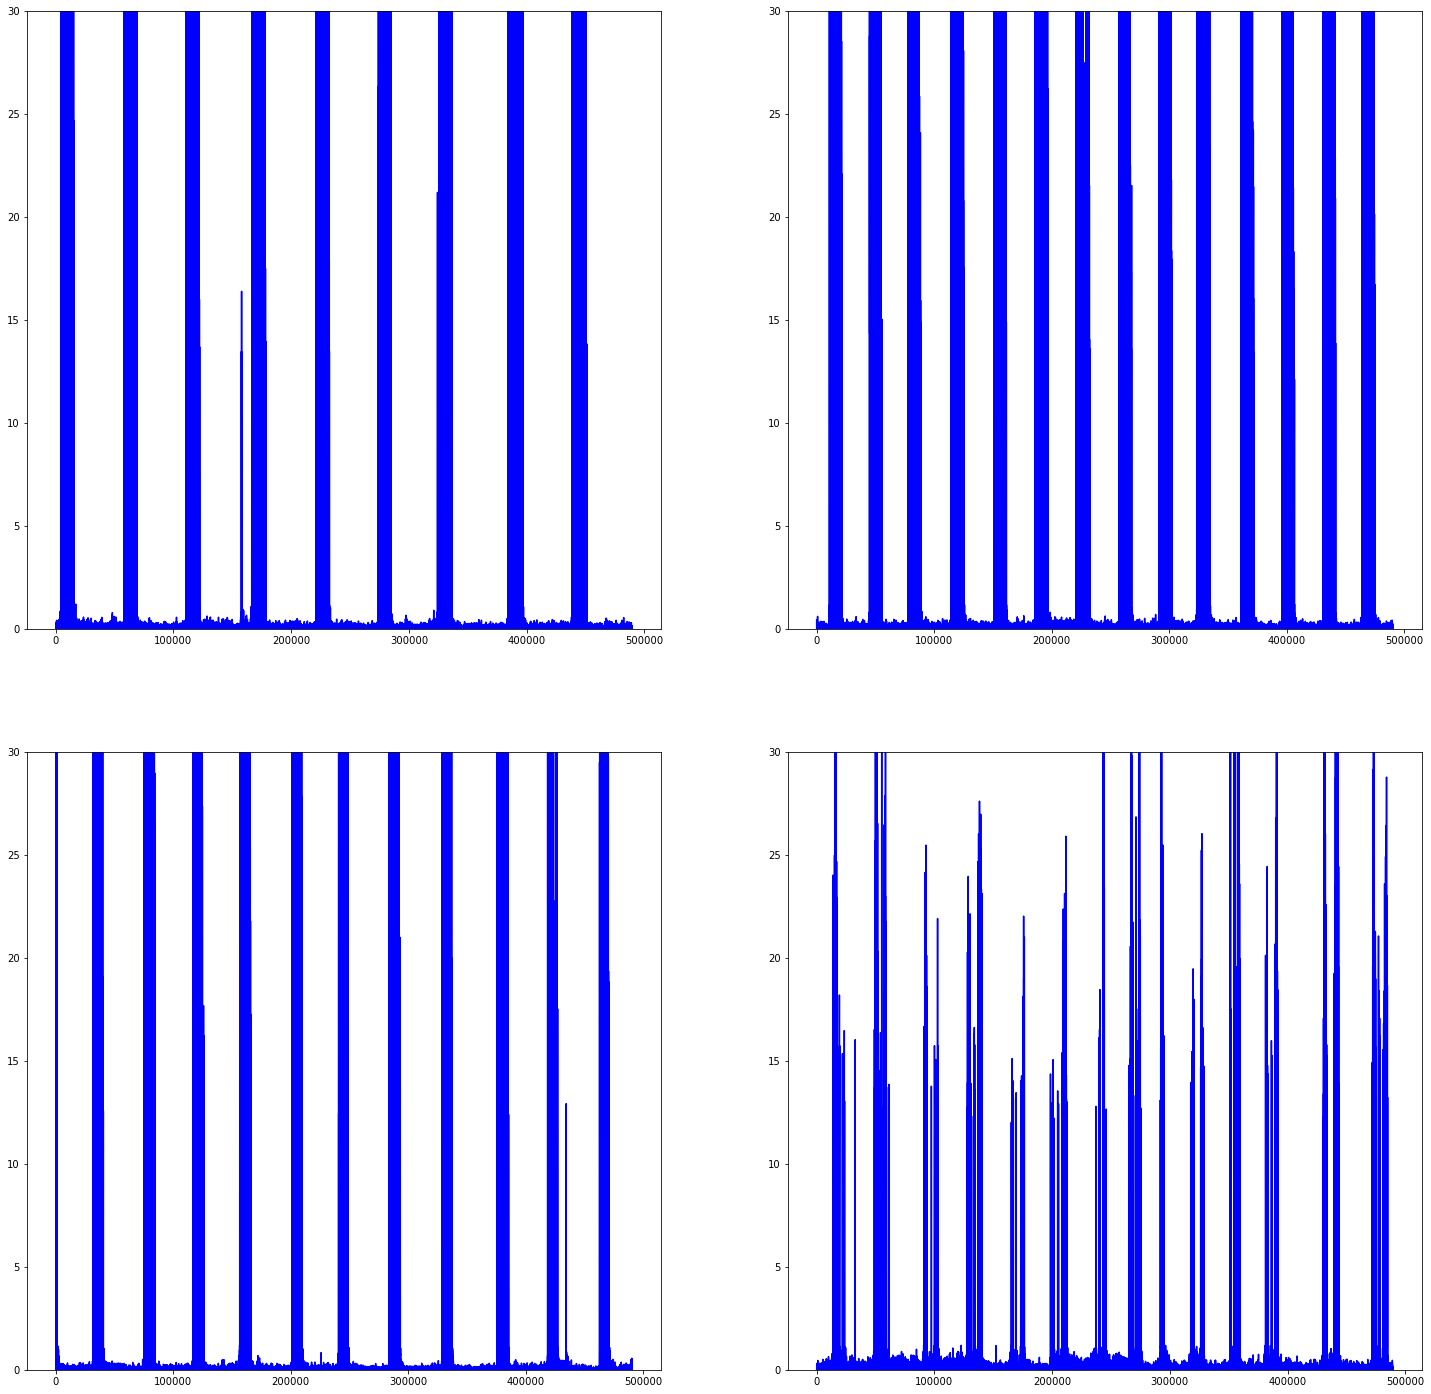

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import os
import IPython.display as ipd
from scipy.io import wavfile
from IPython.display import Audio
import librosa
import math

# Z:\AI\Hi,BB\BB_test
os.chdir('Z://AI/Hi,BB/BB_test')
file_name1 = '양준영_가까운거_test.wav'
file_name2 = '신정례_가까운거_test.wav'
file_name3 = '김진세_가까운거_test.wav'
file_name4 = '성시경_가까운거_test.wav'
fig = plt.figure(figsize=(25,25))

def plot_wav(file_name, index):
    data, sr = librosa.load(file_name, sr=None)

    global fig
    subplt = plt.subplot(2, 2, index)
    subplt.set_ylim(0,30)

#     plt.spines['bottom'].set_color('black')
#     plt.tick_params(axis='x', colors='black')
#     plt.spines['left'].set_color('black')
#     plt.tick_params(axis='y', colors='black')

#     plt.title(file_name, fontdict={'fontsize': 20, 'color': 'black'})
    
#     data = data[:int(len(data)/10)]  # PHONE

#     lowered_noise = [sound/10 if abs(sound) < 800 else sound for sound in data]
#     sub_data = [sound ** 1.2 for sound in lowered_noise]

    amplified_data = [(sound * 200) ** 2 for sound in data]
    cleaned_data = [sound/10 if sound < 12 else sound for sound in amplified_data]

    #phone
    plt.plot(cleaned_data, 'b', label="data")


plot_wav(file_name1, 1)
plot_wav(file_name2, 2)
plot_wav(file_name3, 3)
plot_wav(file_name4, 4)
plt.show()

# Sampling

In [17]:
import numpy as np
import sys
import glob
import os
import IPython.display as ipd
from scipy.io import wavfile
import librosa
import soundfile as sf

THRESHOLD = 20
SAMPLE_LENGTH = 1  #1초
SHIFT = 0.15 #0.1초

def audio_export(file_name, file_index, data, samplerate):
    sf.write(file_name + '_{}.wav'.format(file_index), data, samplerate)
    

def filter_silence(data, samplerate, threshold=THRESHOLD, sample_length=SAMPLE_LENGTH):
    
    frames_in_sample = int(sample_length * samplerate)
    over_threshold_counter = 0
    
    for sound in data:
        if sound > THRESHOLD:
            over_threshold_counter += 1
      
    # 0.001% 의 소리가 threshold를 넘으면 true를 반환한다.
    if (over_threshold_counter / frames_in_sample) > 0.0001:
        return True
    else:
        return False

def sampling(file_name, threshold=THRESHOLD, sample_length=SAMPLE_LENGTH, shift=SHIFT):
    
    data, samplerate = librosa.load(file_name, sr=None)
#     samplerate, data = wavfile.read(file_name + ".wav")
    os.chdir('Z://AI/Hi,BB/BB_test/' + file_name[:-4])
    frames_in_sample = int(sample_length * samplerate)
    frames_in_shift = int(shift * samplerate)
    frames_in_jump = int(0.5 * samplerate)

    # 임시로 데이터를 사이즈 줄인다
#     data = data[:int(len(data)/10)]
    amplified_data = [(sound * 200) ** 2 for sound in data]
    cleaned_data = [sound/10 if sound < 12 else sound for sound in amplified_data]
    start_index = 0
    end_index = 0
    file_index = 1
    
    for i, intensity in enumerate(cleaned_data):
        
        if i > end_index + frames_in_shift * 2:
        
            if intensity > threshold:

                start_index = i - frames_in_shift
                end_index = start_index + frames_in_sample

                # 오디오 파일 처음에 음성이 짤려서 나오거나 마지막에 음성이 짤리면 데이터를 버린다
                if start_index < 0:
                    end_index = i + frames_in_jump
                
                if end_index > len(data):
                    break
                
                if start_index > 0 and end_index < len(data) and filter_silence(cleaned_data[start_index:end_index], samplerate):
                    audio_export(file_name, file_index, data[start_index:end_index], samplerate)
                    file_index += 1
                    
    
    print(file_name, file_index)
                    

os.chdir('Z://AI/Hi,BB/BB_test')                    
files_wav = glob.glob("./*.wav")
files = [os.path.basename(f) for f in files_wav]
for f in files:
    sampling(f)
    os.chdir('Z://AI/Hi,BB/BB_test')

# for filename in files:
    
#     sampling(filename + '.wav')
#     os.chdir('C://Users/jason/OneDrive/Desktop/jupyter/audio/audio_data/Hi,BB_Phone_01-18')



김진세_가까운거_test.wav 12
성시경_가까운거_test.wav 15
신정례_가까운거_test.wav 15
양준영_가까운거_test.wav 10
